In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Explore Data

In [17]:
data = pd.read_csv('housing(1)/housing.csv')

In [18]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [19]:
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [20]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [21]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## Clear data

In [22]:
# Modify missing values in total_bedrooms column with median value
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


C:\Users\quent\AppData\Local\Temp\ipykernel_8460\813525543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [23]:
# Recheck missing values
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


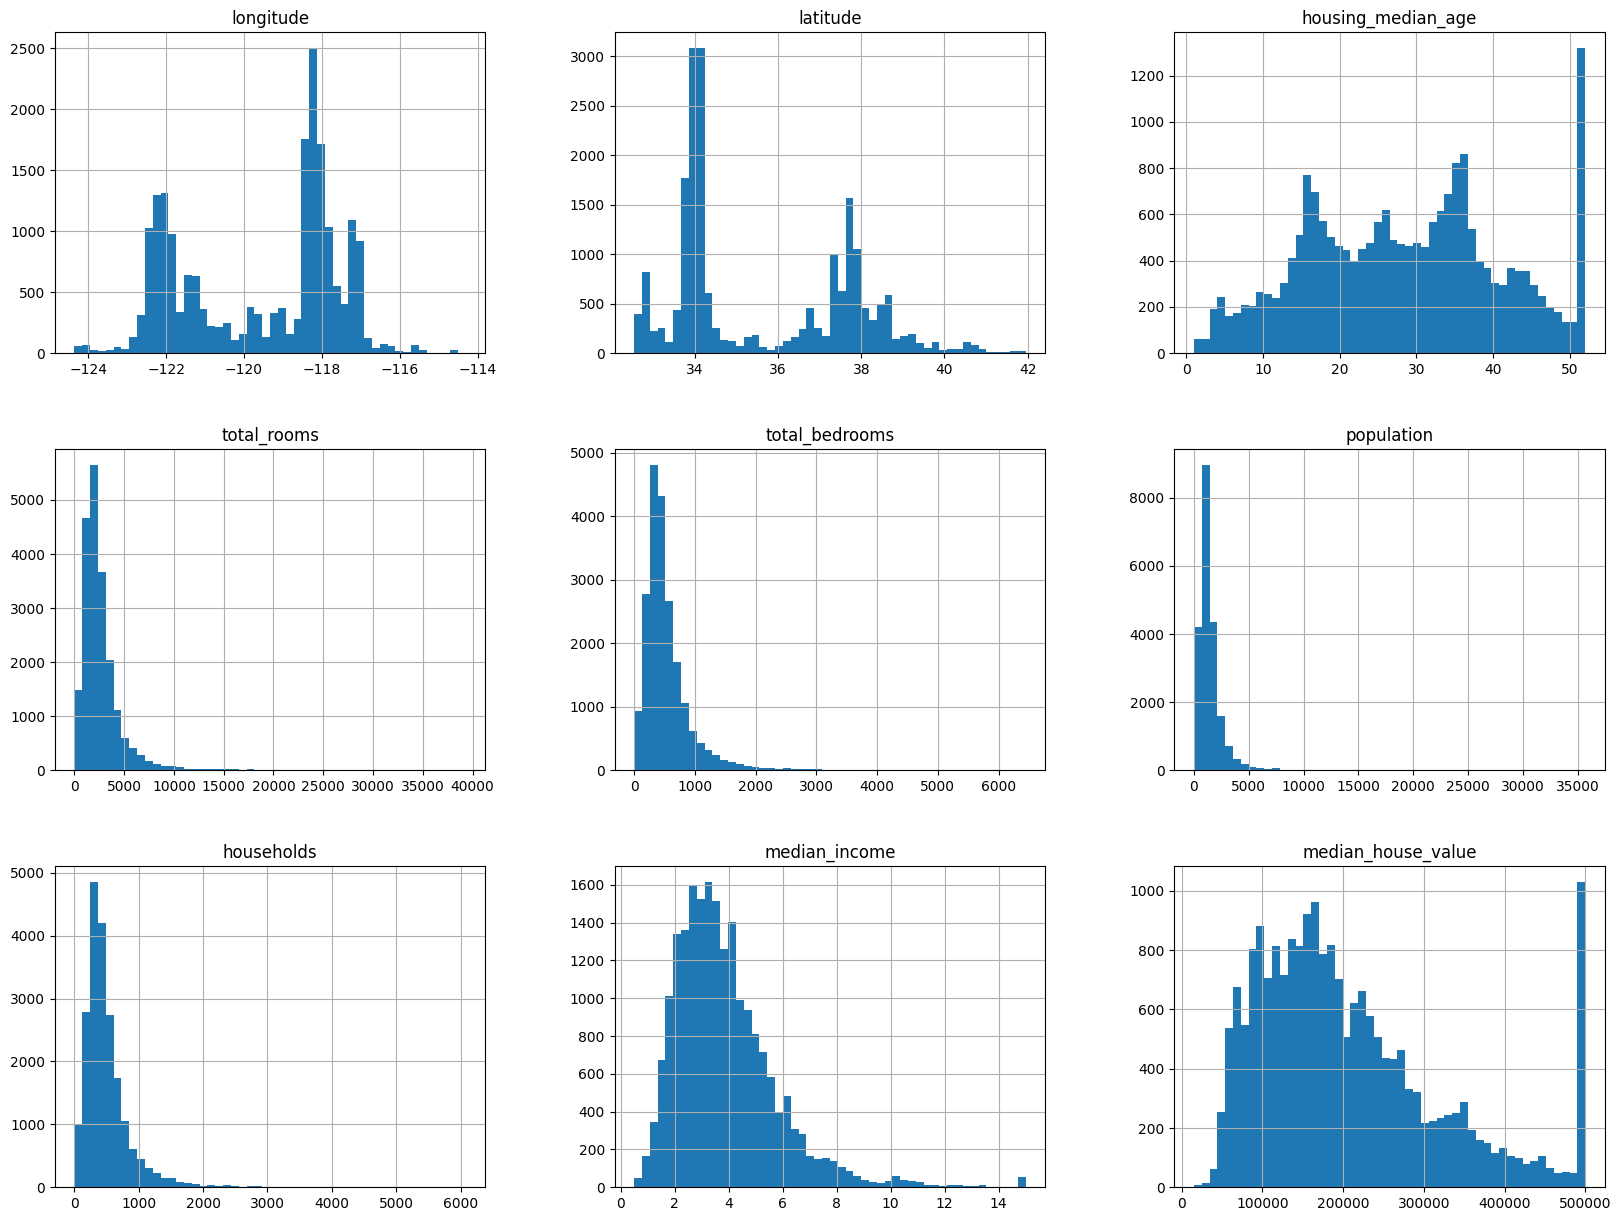

In [24]:
# Plot histogram of all columns
data.hist(bins=50, figsize=(20, 15))
plt.show()

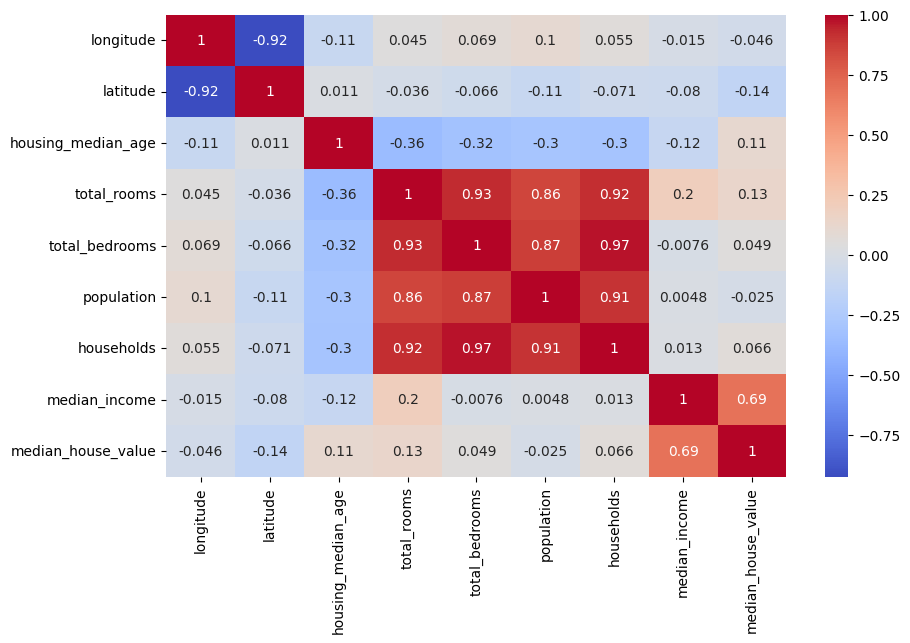

In [25]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['number'])

# Calculer la corrélation et afficher la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.show()

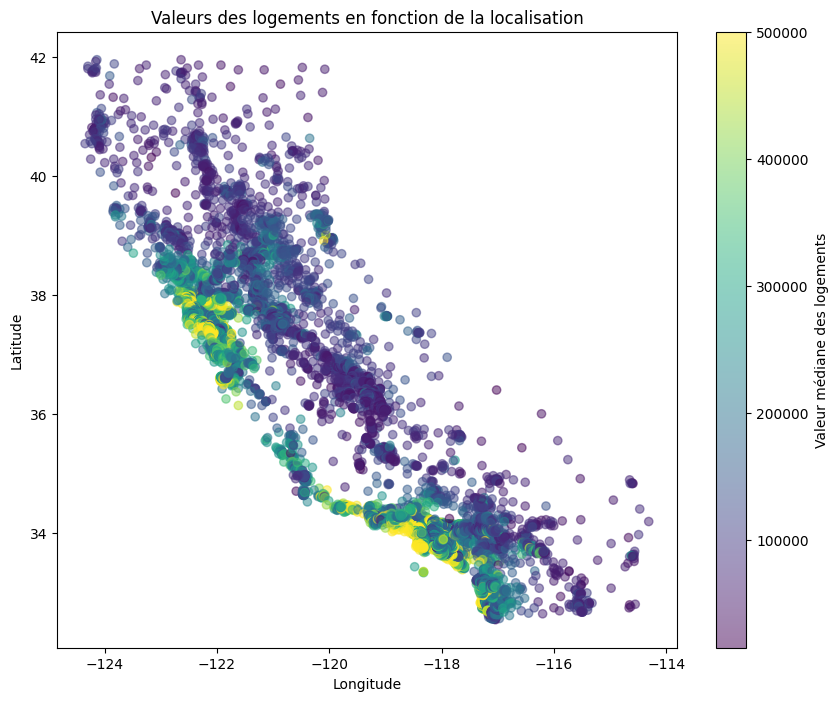

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Valeur médiane des logements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Valeurs des logements en fonction de la localisation')
plt.show()

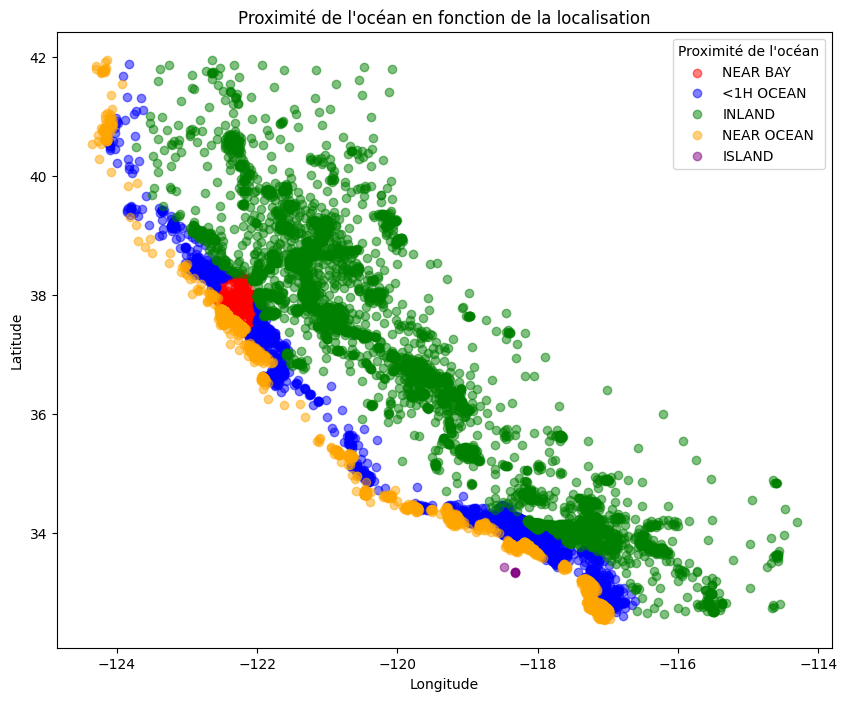

In [27]:
# Importer une palette de couleurs pour les catégories
from matplotlib.colors import ListedColormap

# Créer une figure
plt.figure(figsize=(10, 8))

# Obtenir les catégories uniques
categories = data['ocean_proximity'].unique()

# Créer une palette de couleurs
colors = ListedColormap(['red', 'blue', 'green', 'orange', 'purple'])

# Associer chaque catégorie à une couleur
for i, category in enumerate(categories):
    subset = data[data['ocean_proximity'] == category]
    plt.scatter(subset['longitude'], subset['latitude'], 
                label=category, alpha=0.5, color=colors(i / len(categories)))

# Ajouter les labels et légende
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Proximité de l\'océan en fonction de la localisation')
plt.legend(title='Proximité de l\'océan')
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']

# Apply Standard Scaler to perform feature scaling now median in at 0 and std is 1 (moyenne et écart type)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_features])

# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)

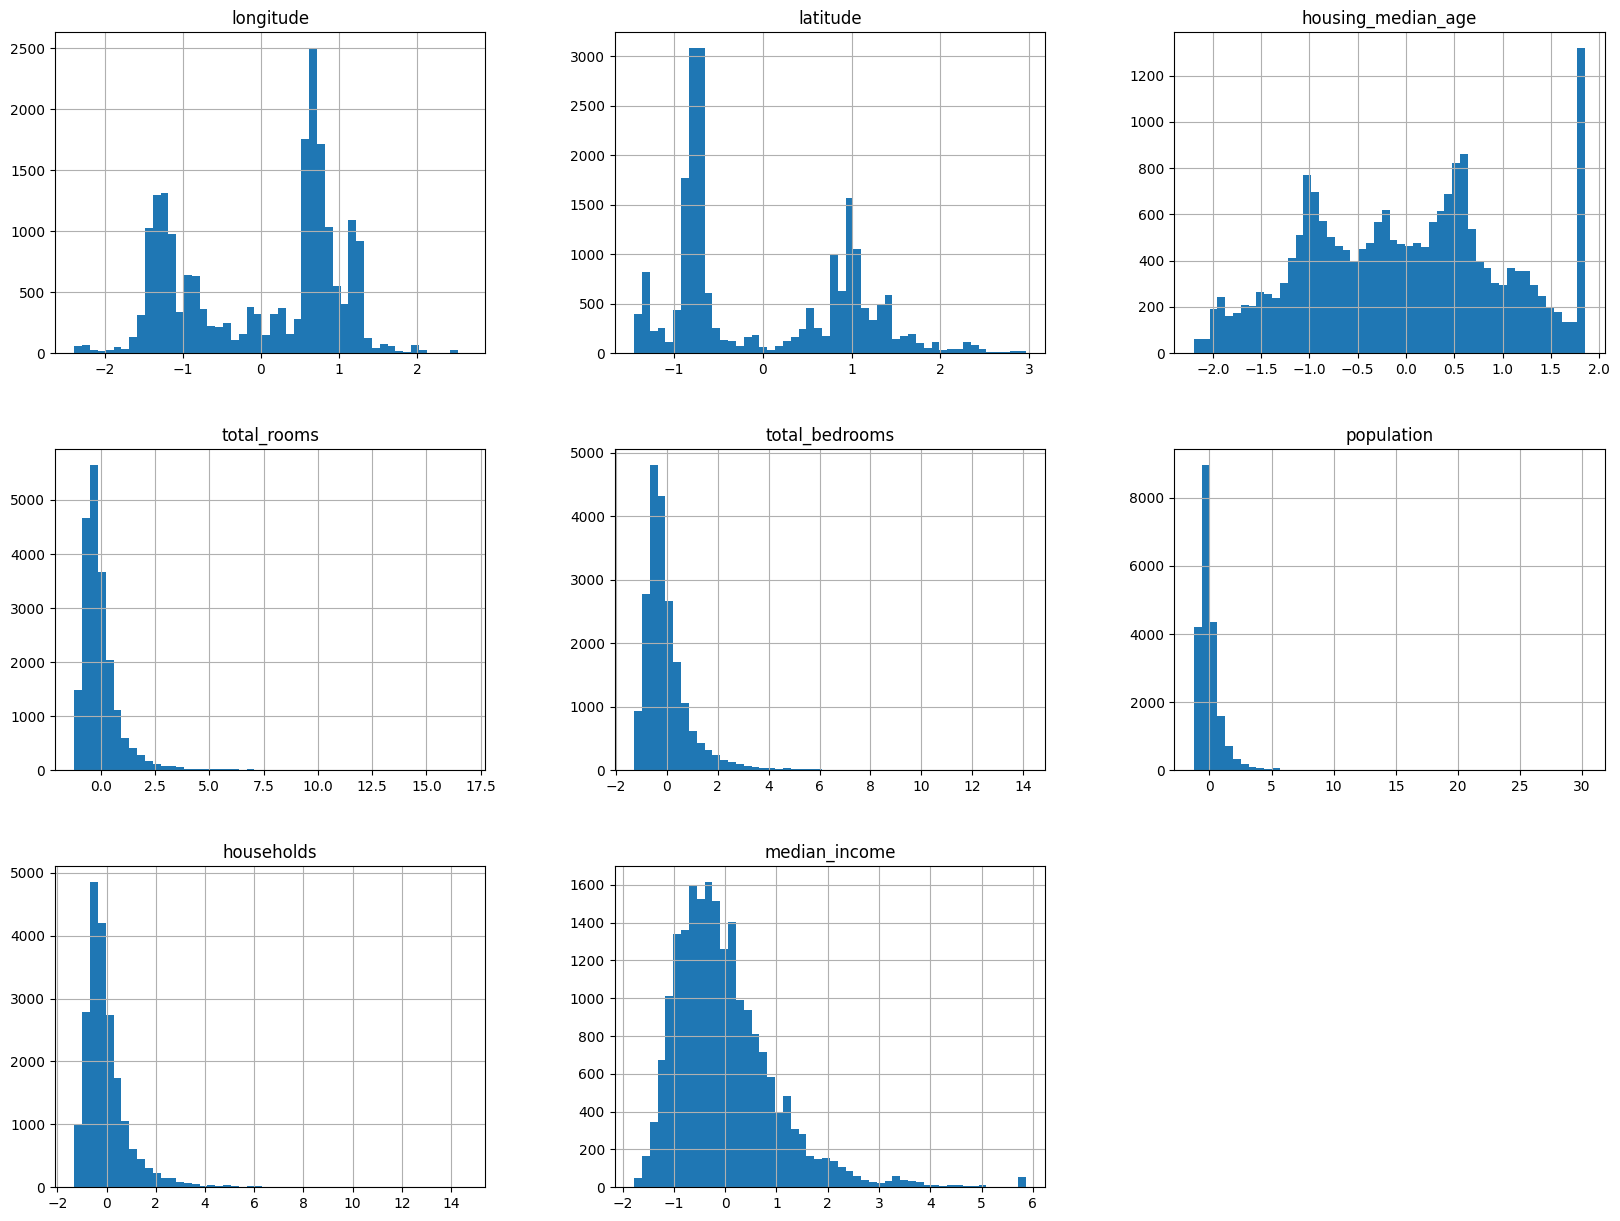

In [29]:
# Plot histogram of all columns
scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

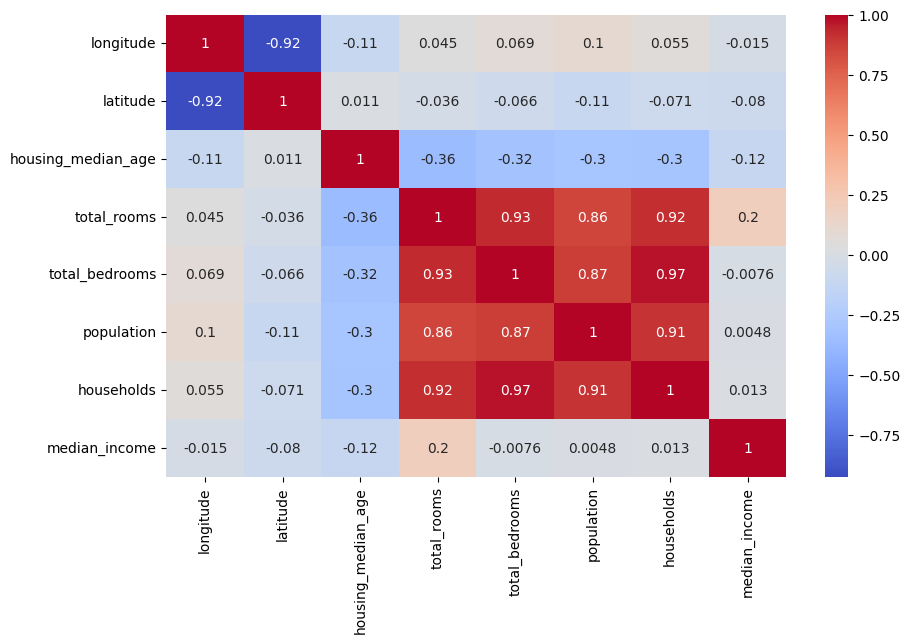

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(scaled_df.corr(), annot=True, cmap="coolwarm")
plt.show()

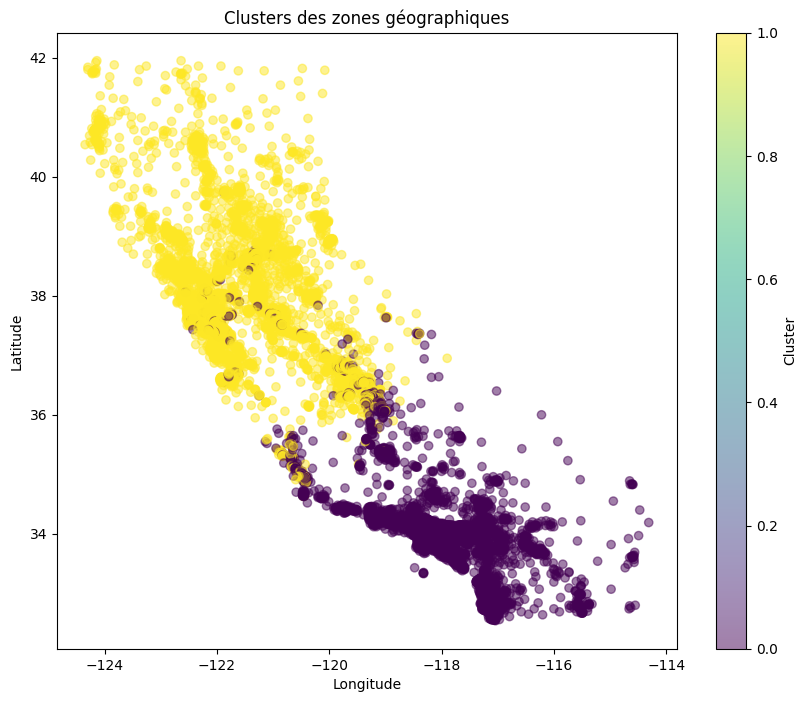

In [31]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

# Apply K-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters 
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters des zones géographiques')
plt.show()

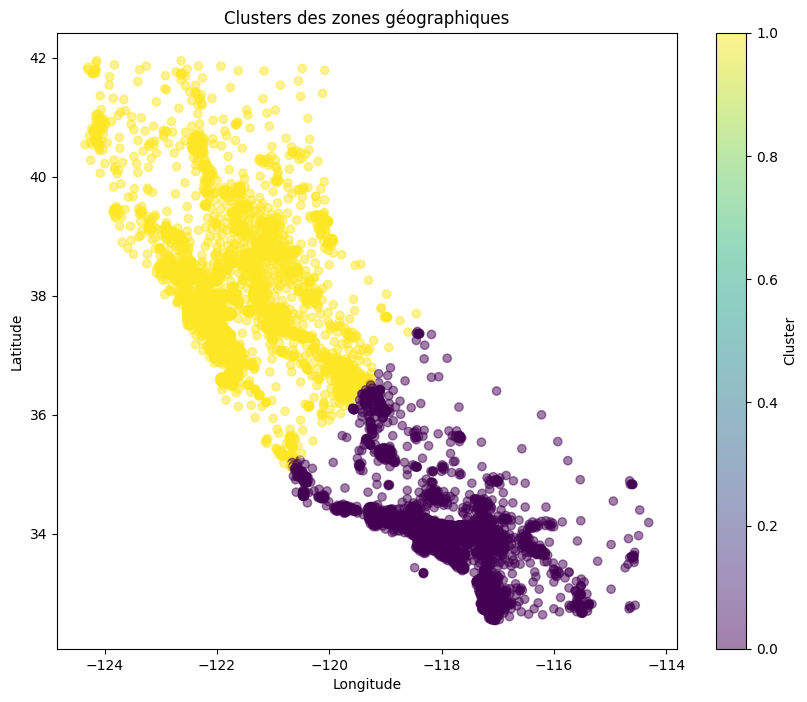

In [32]:
filtered_scaled_df = scaled_df[['longitude', 'latitude', 'median_income', 'housing_median_age']]

# Apply K-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(filtered_scaled_df)

# Plot clusters 
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters des zones géographiques')
plt.show()

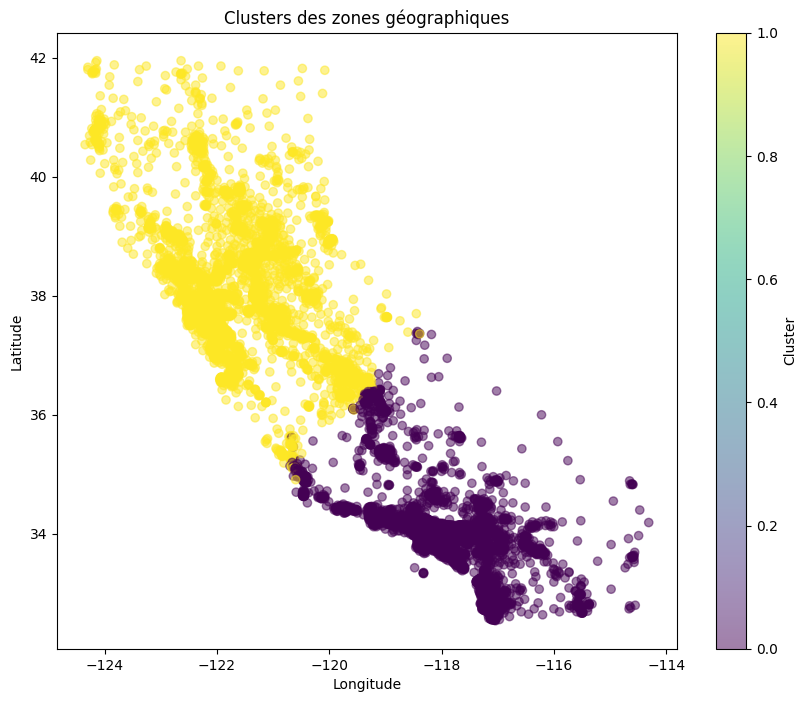

In [33]:
filtered_scaled_df = scaled_df[['longitude', 'latitude', 'median_income', 'housing_median_age', 'households']]

# Apply K-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(filtered_scaled_df)

# Plot clusters 
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters des zones géographiques')
plt.show()

In [34]:
# Dictionnaire pour mapper les catégories à des valeurs numériques
category_mapping = {
    'INLAND': 4,
    '<1H OCEAN': 3,
    'NEAR BAY': 2,
    'NEAR OCEAN': 1, 
    'ISLAND': 0
}

# Appliquer le mapping sur la colonne concernée
data['ocean_proximity'] = data['ocean_proximity'].map(category_mapping)

# Vérifier le résultat
print(data['ocean_proximity'].head())


0    2
1    2
2    2
3    2
4    2
Name: ocean_proximity, dtype: int64


In [35]:

# Select numerical features
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

# Apply Standard Scaler to perform feature scaling now median in at 0 and std is 1 (moyenne et écart type)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_features])

# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)


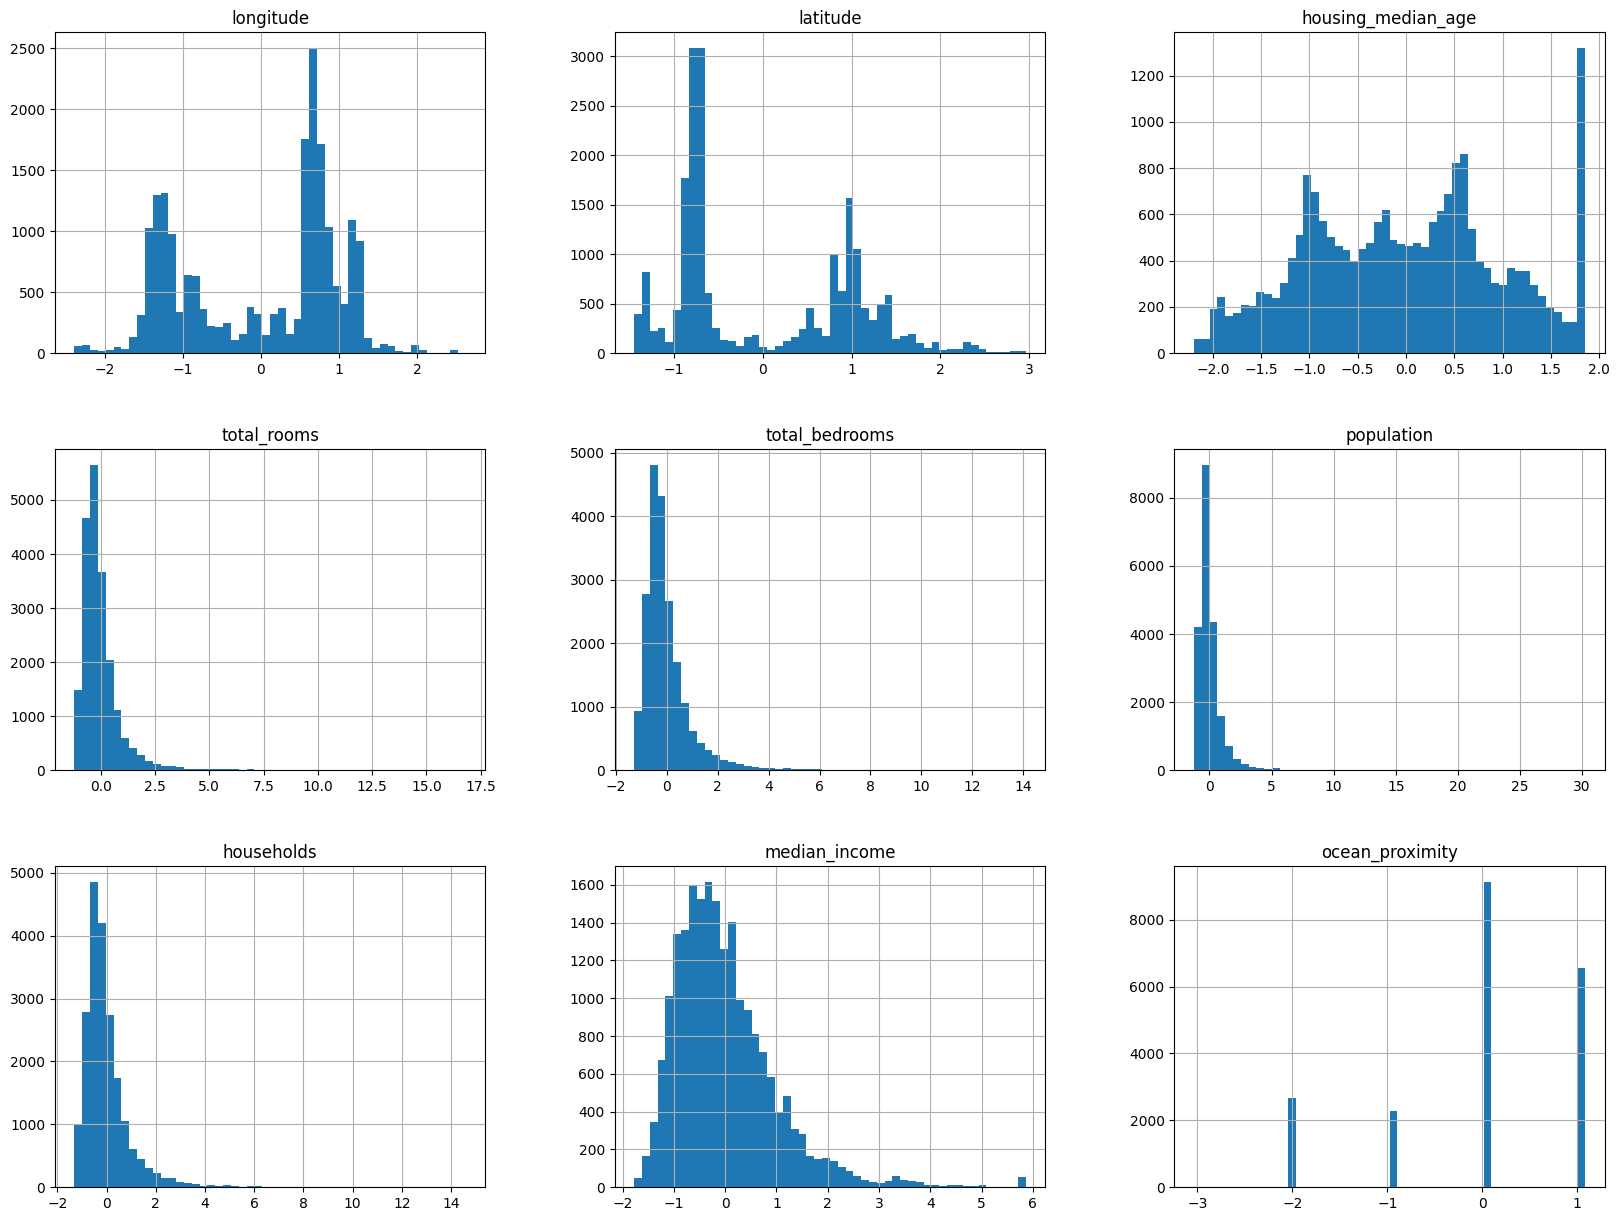

In [36]:
# Plot histogram of all columns
scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

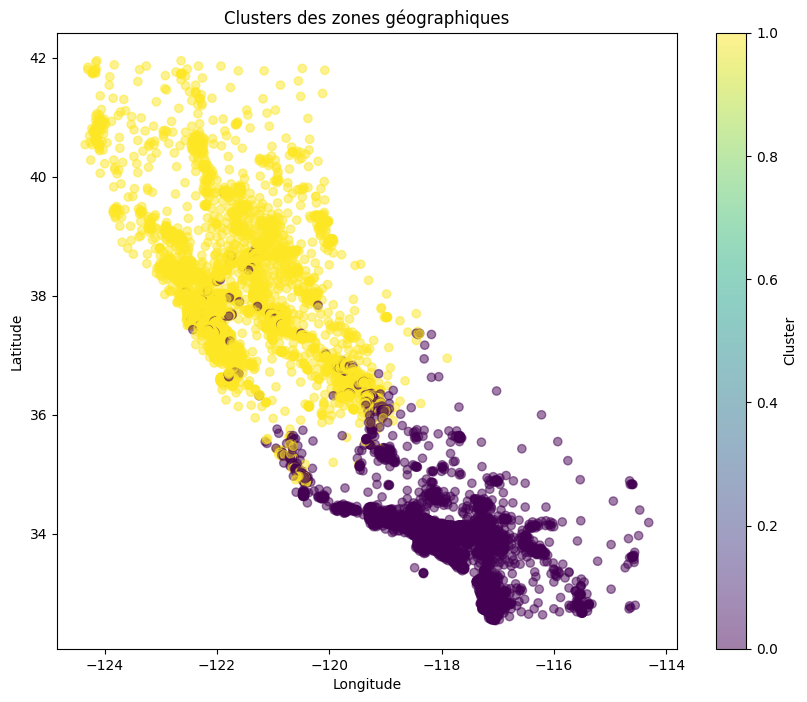

In [37]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

# Apply K-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters 
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters des zones géographiques')
plt.show()

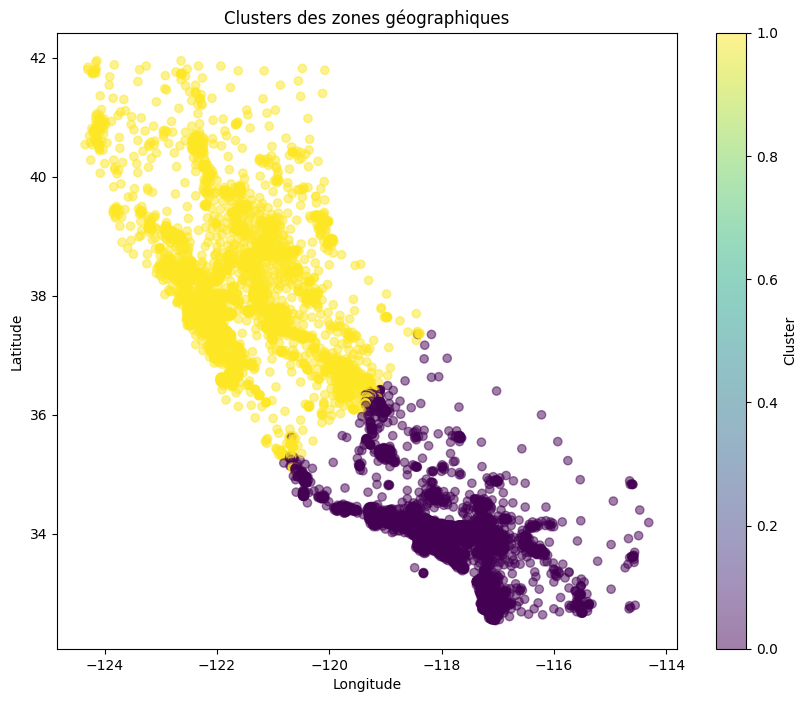

In [38]:
filtered_scaled_df = scaled_df[['longitude', 'latitude', 'median_income', 'housing_median_age', 'households', 'ocean_proximity']]

# Apply K-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(filtered_scaled_df)

# Plot clusters 
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters des zones géographiques')
plt.show()



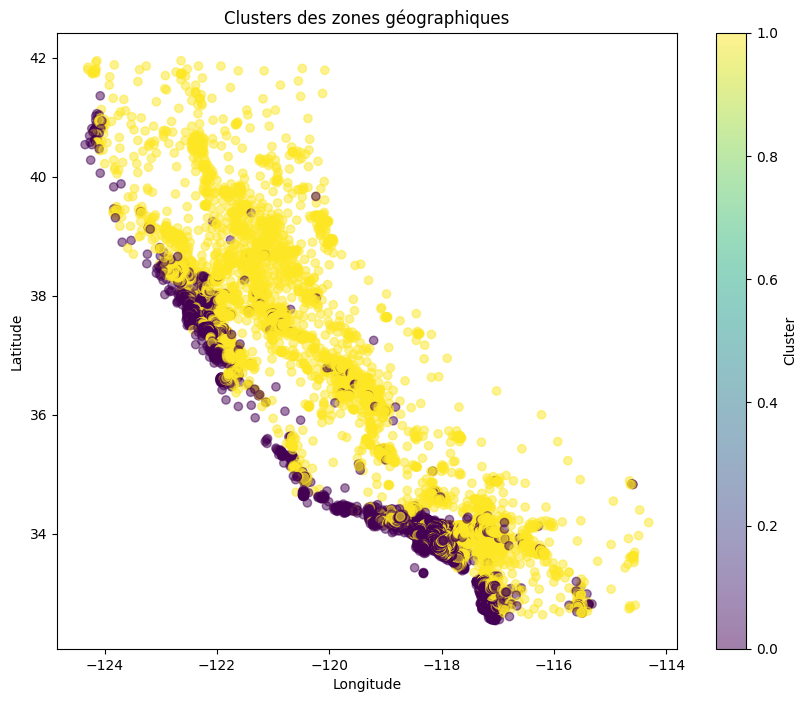

In [39]:
filtered_scaled_df = scaled_df[['latitude', 'median_income', 'housing_median_age', 'households', 'ocean_proximity']]

# Apply K-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(filtered_scaled_df)

# Plot clusters 
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters des zones géographiques')
plt.show()



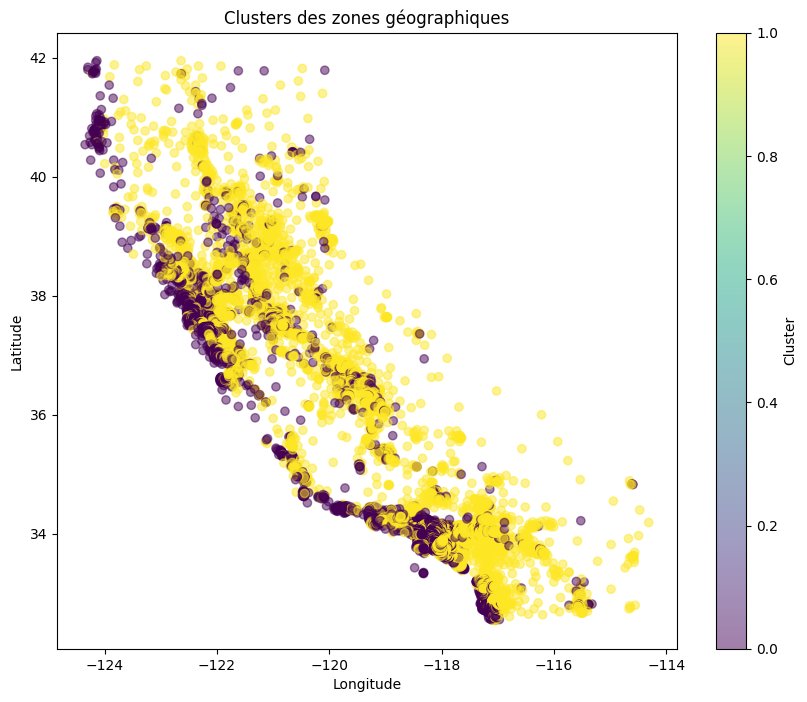

In [40]:
filtered_scaled_df = scaled_df[['median_income', 'housing_median_age', 'households', 'ocean_proximity']]

# Apply K-means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(filtered_scaled_df)

# Plot clusters 
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters des zones géographiques')
plt.show()



          longitude   latitude  median_house_value  median_income  \
Cluster                                                             
0       -118.576102  34.254011       245019.649837       4.269959   
1       -120.719492  37.226297       162692.986831       3.408618   

          population  households  housing_median_age  ocean_proximity_0  \
Cluster                                                                   
0        1554.420069  534.140896           28.839505           0.000452   
1        1276.264737  459.499477           28.408027           0.000000   

         ocean_proximity_1  ocean_proximity_2  ocean_proximity_3  \
Cluster                                                            
0                 0.181629           0.000000           0.793353   
1                 0.067621           0.239339           0.036789   

         ocean_proximity_4  
Cluster                     
0                 0.024566  
1                 0.656250  


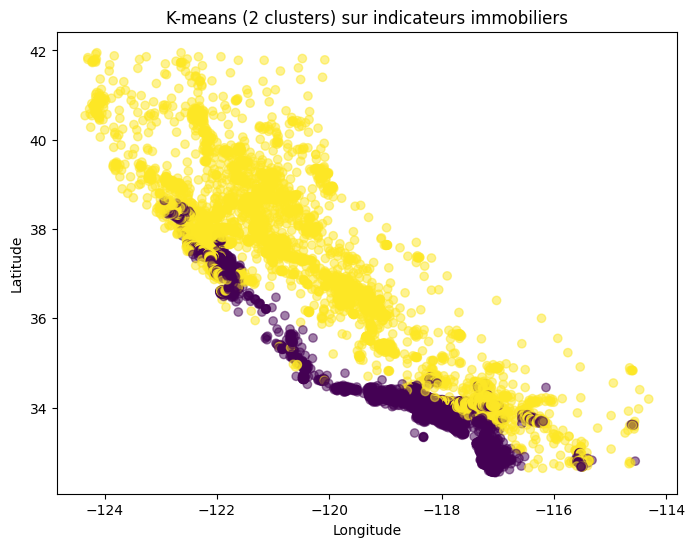

In [45]:
# Chargement des données

# Encodage de la variable 'ocean_proximity' en one-hot
data_encoded = pd.get_dummies(data, columns=["ocean_proximity"])

# Sélection des indicateurs utiles
features = [
    "longitude",
    "latitude",
    "median_house_value",
    "median_income",
    "population",
    "households",
    "housing_median_age"
] + [col for col in data_encoded.columns if "ocean_proximity_" in col]

X = data_encoded[features].copy()

# Gestion basique des valeurs manquantes
X.fillna(X.median(), inplace=True)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means pour 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Ajout au DataFrame
data_encoded["Cluster"] = labels

# Moyennes par cluster
cluster_means = data_encoded.groupby("Cluster")[features].mean()
print(cluster_means)

# Visualisation simple (longitude vs latitude)
plt.figure(figsize=(8,6))
plt.scatter(data_encoded["longitude"], data_encoded["latitude"], c=labels, cmap="viridis", alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-means (2 clusters) sur indicateurs immobiliers")
plt.show()